In [1]:
import pprint
import torch
import matplotlib.pyplot as plt
import numpy

# %matplotlib inline

In [2]:
names = open('names.txt', 'r').read().splitlines()
print(names[:5])

['emma', 'olivia', 'ava', 'isabella', 'sophia']


In [3]:
# List of all the characters
chars = sorted(list(set("".join(names))))

# Character to index mapping
char_to_index = {char: idx+1 for idx, char in enumerate(chars)}
char_to_index["."] = 0

# Index to character mapping
index_to_char = {idx: char for char, idx in char_to_index.items()}

In [81]:
# Create the training set of bigrams
X, Y = [], []

for name in names:
    name_with_start_end_token = ["."] + list(name) + ["."]
    
    for char1, char2 in zip(name_with_start_end_token, name_with_start_end_token[1:]):
        # Find the index of the character
        char1_idx = char_to_index[char1]
        char2_idx = char_to_index[char2]

        # Add the first character to the input X and the second character to the output Y
        X.append(char1_idx)
        Y.append(char2_idx)

# Convert the arrays into tensors
X = torch.tensor(X)
Y = torch.tensor(Y)

# Count the number of training data
num_of_training_data = X.nelement()

# Initialize a generator with seed
gen = torch.Generator().manual_seed(2147483647)

# Randomly initialize 27 neurons weights where each neuron will have 27 inputs
W = torch.randn((27, 27), generator=gen, requires_grad=True)

In [82]:
loss_history = []

for i in range(300):
    # Forward pass the inputs (Note: Counts and prob together makes the softmax function)
    X_enc = torch.nn.functional.one_hot(X, num_classes=27).float() # Input to the networ, One hot encoding
    logits = X_enc @ W # Predict the log counts
    counts = logits.exp() # Calculate counts which is equivalent to char_seq_frequencies
    prob = counts / counts.sum(1, keepdims=True) # Calculate the probabilities for the next character

    # Calculate the loss (There is minus sign in front in log calculation)
    regularization_loss = 0.01* (W**2).mean() # Make the Weights go towards zero ( If the weights are very far 
    # from zero then the regularization loss will be higher. It will basically provide small extra force to push the weights towards zero.
    # Pushing the weights towards zero will make all the weights uniform because if all the weights are zero then the probability
    # is uniform for all the char sequence. So, pushing the weights towards zero means trying to make the model smoother. It is similar to
    # adding char_seq_freq = char_seq_freq + 1, so that no char sequence is 0)
    
    loss = -prob[torch.arange(num_of_training_data), Y].log().mean() + regularization_loss  # Getting the predicted probability of the output
    # For example if X = 0 and Y = 2 then we predict the probability of the X = 0 will all the 27 characters
    # We will only extract the probability predicted by our network of what the actual output should have been i.e 2nd index
    # So, get the probability of the 2nd index and then calculate the likelihood (loss)
    # i.e negative log of the predicted probability of the Y index ( i.e. The character that should have been the output )
    # The probability of the output character should always be high
    # In above example we are getting the probabilities for all the training data at once

    loss_history.append(loss.item())
    print(loss.item())
    
    # Backward pass
    W.grad = None
    loss.backward()
    
    # Update the parameters
    W.data += -20 * W.grad

3.7686190605163574
3.59576153755188
3.4581966400146484
3.346451759338379
3.2553584575653076
3.1806793212890625
3.1186025142669678
3.0660784244537354
3.020946502685547
2.9817287921905518
2.9473729133605957
2.917084217071533
2.8902266025543213
2.8662779331207275
2.84480357170105
2.82544207572937
2.807892084121704
2.7919018268585205
2.77726411819458
2.763803482055664
2.751375198364258
2.7398571968078613
2.729146718978882
2.7191574573516846
2.709815740585327
2.7010583877563477
2.6928319931030273
2.6850900650024414
2.6777915954589844
2.670901298522949
2.6643874645233154
2.658221960067749
2.6523802280426025
2.6468396186828613
2.6415798664093018
2.6365816593170166
2.631829023361206
2.627304792404175
2.622995615005493
2.6188876628875732
2.6149685382843018
2.611227035522461
2.607651948928833
2.6042332649230957
2.6009626388549805
2.597830295562744
2.5948290824890137
2.5919504165649414
2.589188575744629
2.586536407470703
2.5839877128601074
2.5815370082855225
2.579178810119629
2.576908588409424
2.

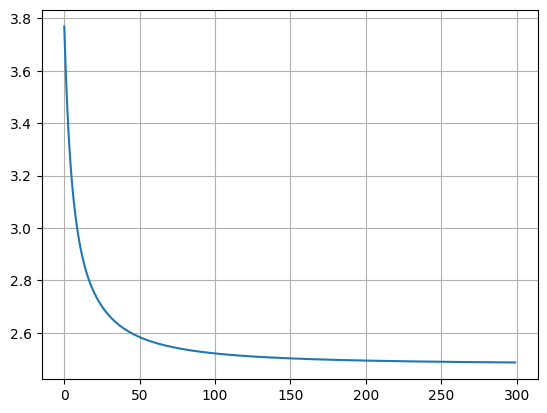

In [87]:
plt.plot(loss_history)
plt.grid()
plt.savefig("static/loss_graph.png")
plt.show()

In [7]:
# Prediction using the neural network
gen = torch.Generator().manual_seed(2147483647)

for i in range(10):
    pred_idx = 0
    out = []

    while True:
        # Forward pass the inputs (Note: Counts and prob together makes the softmax function)
        X_enc = torch.nn.functional.one_hot(torch.tensor([pred_idx]), num_classes=27).float() # Input to the network, One hot encoding
        logits = X_enc @ W # Predict the log counts
        counts = logits.exp() # Calculate counts which is equivalent to char_seq_frequencies
        prob = counts / counts.sum(1, keepdims=True) # Calculate the probabilities for the next character
        
        pred_idx = torch.multinomial(prob, 1, replacement=True, generator=gen).item()
        out.append(index_to_char[pred_idx]);
    
        if (pred_idx == 0):
            break
            
    print("".join(out))

junide.
janasah.
p.
cfay.
a.
nn.
kohin.
tolian.
juwe.
ksahnaauranilevias.
